In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)

In [3]:
def check_and_install_library(library_name):
  try:
    importlib.import_module(library_name)
    print(f"{library_name} is already installed.")
  except ImportError:
    print(f"{library_name} is not installed. Installing....")
    try:
        import pip
        pip.main(["install",library_name])
    except:
      print("error: failed to install the library. please install it manually.")



In [4]:




if 'rating_Electronics'not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download("https://www.kaggle.com/datasets/irvifa/amazon-product-reviews")

opendatasets is not installed. Installing....


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting opendatasets

Downloading opendatasets-0.1.22-py3-none-any.whl (15 kB)

Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from opendatasets) (4.66.1)

Requirement already satisfied: kaggle in /usr/local/lib/python3.10/dist-packages (from opendatasets) (1.5.16)

Requirement already satisfied: click in /usr/local/lib/python3.10/dist-packages (from opendatasets) (8.1.7)

Requirement already satisfied: six>=1.10 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (1.16.0)

Requirement already satisfied: certifi in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2023.11.17)

Requirement already satisfied: python-dateutil in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.8.2)

Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.31.0)

Requirement already satisfied: python-slugify in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (8.0.1)

Requirement already satisfied: urllib3 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.0.7)

Requirement already satisfied: bleach in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (6.1.0)

Requirement already satisfied: webencodings in /usr/local/lib/python3.10/dist-packages (from bleach->kaggle->opendatasets) (0.5.1)

Requirement already satisfied: text-unidecode>=1.3 in /usr/local/lib/python3.10/dist-packages (from python-slugify->kaggle->opendatasets) (1.3)

Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.3.2)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.6)

Installing collected packages: opendatasets

Successfully installed opendatasets-0.1.22

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sivaram115
Your Kaggle Key: ··········


100%|██████████| 109M/109M [00:01<00:00, 76.5MB/s]


In [5]:
df=pd.read_csv("/content/amazon-product-reviews/ratings_Electronics.csv",names=['userId','productId','rating','timestamp'])

In [6]:
df

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [7]:
df.shape


(7824482, 4)

In [8]:


df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

In [9]:
sample_data=df.sample(n=1564896,ignore_index=True)

In [10]:
del df


In [11]:
sample_data.head()

,userId,productId,rating,timestamp
0,ACQ7G171QVU6Z,B007FL6100,4.0,1341532800
1,ADNDBRME51T70,B004SBBD8U,5.0,1356220800
2,AGQ1ZJBQNAEU1,B002OB4BKI,5.0,1383091200
3,A7UI3PIEZG5EW,B004AH9W8A,5.0,1391385600
4,AEQYAG42F9128,B00FB45SI4,5.0,1405900800


In [12]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [13]:
sample_data.drop('timestamp',axis=1,inplace=True)

In [14]:
sample_data.describe()

,rating
count,1.564896e+06
mean,4.014036e+00
std,1.380147e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [15]:
sample_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [16]:
sample_data[sample_data.duplicated()].shape[0]

0

In [17]:
sample_data.head()

,userId,productId,rating
0,ACQ7G171QVU6Z,B007FL6100,4.0
1,ADNDBRME51T70,B004SBBD8U,5.0
2,AGQ1ZJBQNAEU1,B002OB4BKI,5.0
3,A7UI3PIEZG5EW,B004AH9W8A,5.0
4,AEQYAG42F9128,B00FB45SI4,5.0


In [18]:
plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

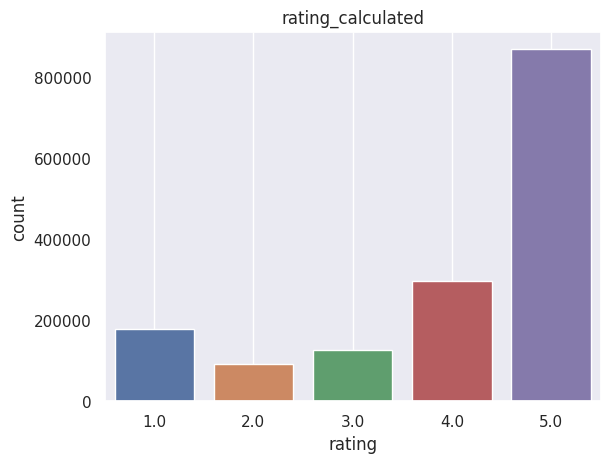

In [19]:
sns.countplot(x='rating',data=sample_data)
plt.title("rating_calculated")
plt.xlabel("rating")
plt.ylabel("count")
plt.grid()
plt.show

In [21]:
print('total rarting :',sample_data.shape[0])
print('total unique users:',sample_data['userId'].unique().shape[0])
print('total unique products:',sample_data['productId'].unique().shape[0])

total rarting : 1564896
total unique users: 1225808
total unique products: 237530


In [50]:
no_of_rated_products_per_user = sample_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)


In [30]:
no_of_rated_products_per_user.head()

userId
A3OXHLG6DIBRW8    107
A5JLAU2ARJ0BO      94
ADLVFFE4VBT8       86
A6FIAB28IS79       82
A2AY4YUOX2N1BQ     75
Name: rating, dtype: int64

In [51]:
 print('no of rated products more than 50 per user:{}'.format(sum(no_of_rated_products_per_user >= 50)))

no of rated products more than 50 per user:26


In [52]:
data=sample_data.groupby("productId").filter(lambda x:x['rating'].count() >=50)

In [53]:
data.head()

,userId,productId,rating
0,ACQ7G171QVU6Z,B007FL6100,4.0
1,ADNDBRME51T70,B004SBBD8U,5.0
4,AEQYAG42F9128,B00FB45SI4,5.0
8,A32G080OI8O113,B000P0O12I,5.0
12,A21GTH20R33D6B,B000N5WINO,4.0


In [42]:
no_of_rated_products_per_user=data.groupby('productId')['rating'].count().sort_values(ascending=False)

<Axes: xlabel='productId'>

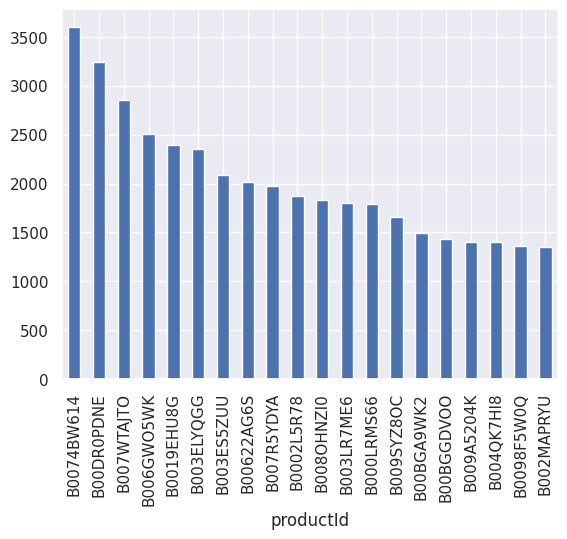

In [44]:
no_of_rated_products_per_user.head(20).plot(kind='bar')

In [56]:
mean_rating_product_count = pd.DataFrame(data.groupby('productId')['rating'].mean())

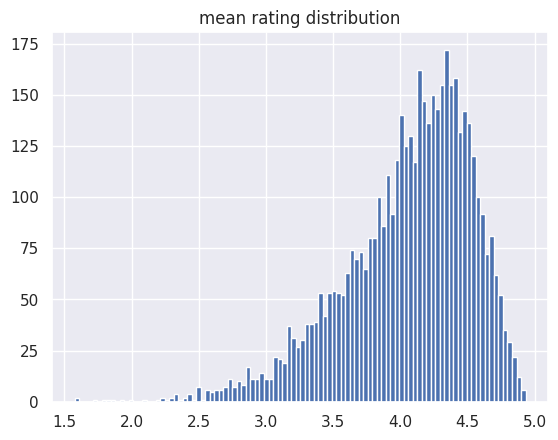

In [57]:
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title("mean rating distribution")
plt.show()

In [58]:
mean_rating_product_count['rating'].skew()

-0.966335335150867

In [59]:
mean_rating_product_count['rating_counts']= pd.DataFrame(data.groupby('productId')["rating"].count())

In [60]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.576355,203
1400501466,3.517857,56
1400532655,4.010204,98
140053271X,3.802632,76
B00000DM9W,4.632353,68


In [61]:
mean_rating_product_count[mean_rating_product_count['rating_counts']== mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.502499,3602


In [62]:
print("min average rating product :",mean_rating_product_count['rating_counts'].min())

min average rating product : 50


In [68]:
print("total min average rating products:",mean_rating_product_count[mean_rating_product_count['rating_counts']== mean_rating_product_count['rating_counts'].min()].shape[0])

total min average rating products: 137


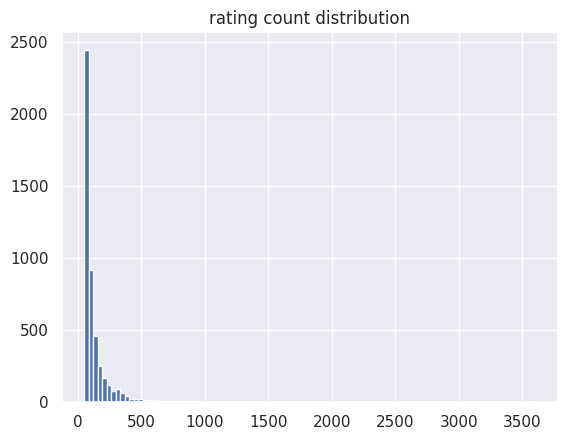

In [69]:
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

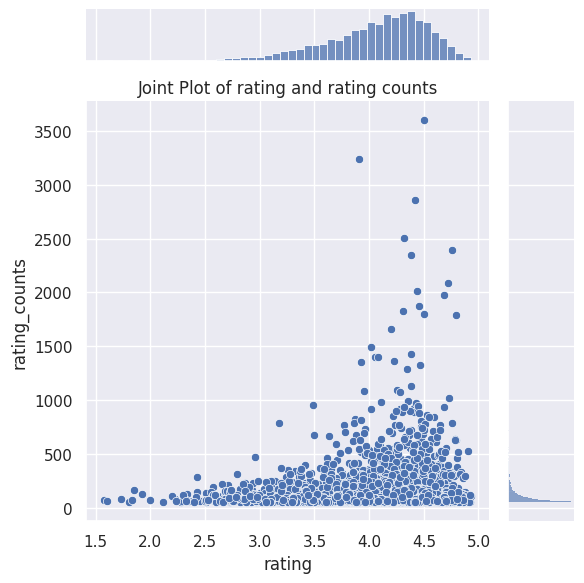

In [70]:
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()


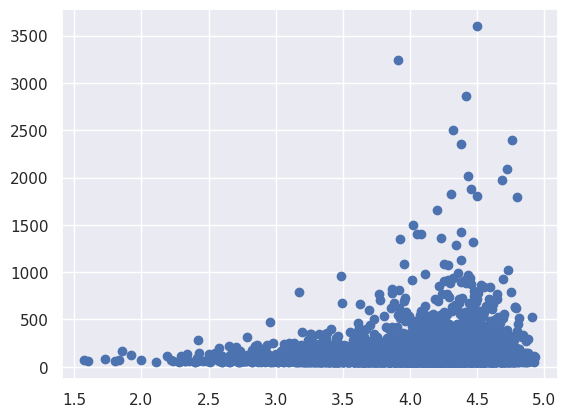

In [71]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()


In [72]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.1135976105003531 


In [73]:
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


surprise is not installed. Installing....


Collecting surprise

Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)

Collecting scikit-surprise (from surprise)

Downloading scikit-surprise-1.1.3.tar.gz (771 kB)

Output()

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Requirement already satisfied: joblib>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.3.2)

Requirement already satisfied: numpy>=1.17.3 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.23.5)

Requirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.11.4)

Building wheels for collected packages: scikit-surprise

Building wheel for scikit-surprise (setup.py): started

Building wheel for scikit-surprise (setup.py): finished with status 'done'

Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163703 sha256=3cd3da0b4c3bfe717a8f01d1a56cf3dc82dbbfb077f428098e84c8f64fec6656

Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445

Successfully built scikit-surprise

Installing collected packages: scikit-surprise, surprise

Successfully installed scikit-surprise-1.1.3 surprise-0.1

In [74]:
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)


In [76]:
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)


In [77]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [78]:
test_pred=algo.test(testset)

In [79]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3134


1.3133615074804954

In [80]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JI4F,B00000K135,B00000K2YR,B00001OWYM,B00001P4XA,...,B00HWSXVDG,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00IF0JAYE,B00IF70QCW,B00IGISO9C,B00INNP5VU,B00IO1V33U,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A0040352FB51XJ8TA9V0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00810011OUSJEMLG9GLE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00850438H0YYT7OD6KL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0104223HJG1ML8O05C0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02172733LZJV9DKGN4I1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
ratings_matrix.shape

(19854, 4380)

In [82]:
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A0040352FB51XJ8TA9V0,A00810011OUSJEMLG9GLE,A00850438H0YYT7OD6KL,A0104223HJG1ML8O05C0,A02172733LZJV9DKGN4I1,A02475813MH5NP5SOY0D9,A02674622L8Y3G1WP2YU9,A030554635WMBA9M36T1R,A03623331O2HEFI2IVNBV,A04136462V965XXPDPY2,...,AZXSDDUHY5KFE,AZXTOS05ZEU6F,AZY6XP0WB3LBJ,AZYHABKM9C79H,AZYJL74GZ236C,AZYWSTJ9ZADFS,AZZB6XD153BP,AZZCT56PUXILB,AZZI45TVONAY3,AZZVENWK2JA83
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000J061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000J1V5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
x_ratings_matrix.shape

(4380, 19854)

In [84]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4380, 10)

In [85]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4380, 4380)

In [86]:
x_ratings_matrix.index[10]

'B00001P4ZH'

In [87]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

10


In [88]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4380,)

In [89]:
correlation_matrix[correlation_product_ID>0.75].shape

(288, 4380)

In [95]:
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
print("recomended products that are correeated:",recommend[:20])

recomended products that are correeated: ['0972683275', 'B00001P4ZH', 'B00004SB92', 'B00004ZCJE', 'B00005T380', 'B00005T3N3', 'B000066R6M', 'B000068O3C', 'B00007AKDL', 'B00009UT9B', 'B00009V332', 'B0000A0AEM', 'B0000AZK4G', 'B0001A3N6C', 'B0001DBEM4', 'B00024ENES', 'B00029U1DK', 'B0002VAQR4', 'B000812QC6', 'B000BI2180']
